In [2]:
import numpy as np

In [3]:
## 데이터 생성
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 분리
train_data, test_data, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [10]:
print(train_data)
print('-----------------')
print(train_target)
print('-----------------')
print(test_data)
print('-----------------')
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-----------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-----------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-----------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [11]:
# 2차원 데이터 생성
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [12]:
print(train_data)
print('-----------------')
print(test_data)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
-----------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [40]:
# 클래스(모델) 객체 생성
kn_r = KNeighborsRegressor(n_neighbors=3)
kn_r

KNeighborsRegressor(n_neighbors=3)

In [41]:
# 훈련데이터 학습 : 훈련모델 생성
kn_r.fit(train_data, train_target)

KNeighborsRegressor(n_neighbors=3)

In [46]:
# 예측데이터 : 50 / 100
print(kn_r.predict([[100]]))

[1033.33333333]


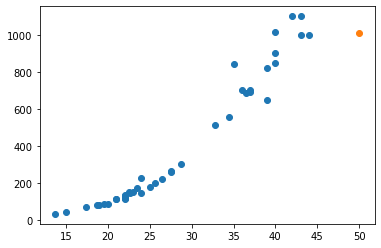

In [47]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.scatter(50, 1010)

plt.show()

In [48]:
distances_r, indexes_r = kn_r.kneighbors([[50]])
print(distances_r)
print(indexes_r)

[[6. 7. 7.]]
[[34  8 14]]


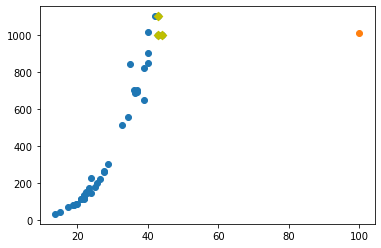

In [50]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
# plt.scatter(50, 1010)
plt.scatter(100, 1010)
plt.scatter(train_data[indexes_r], train_target[indexes_r], marker = 'D',c='y')

plt.show()

In [ ]:
'''
KNN의 경우 훈련데이터 내의 범위 내에서만 예측이 가능하다는 단점을 가지고 있다.
범위를 벗어나면 예측이 불가능하다는 한계가 있다.

훈련데이터 범위 밖의 데이터를 예측하기 위해서는 선형회귀로 진행해야한다.
'''

## 선형회귀(Linear Regression)
- 많이 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행수 초반에 주로 진행
- 선형회귀 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
- 직선을 '추세선'이라고 합니다.
- 선형회귀 알고리즘 : 1차 방정식(y=ax+b)


- 선형회귀 클래스(모델) : LinearRegresin
- 사용되는 패키지 : sklearn.linear_model